In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import statsmodels.api as sm

In [3]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False )

In [22]:
import warnings
warnings. filterwarnings('ignore')

## 비선형 모형

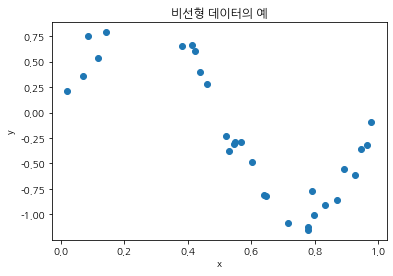

In [12]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1
    X = X[:, np.newaxis]   #np.newaxis는 차원확장 
    return (X, y)

X, y = make_nonlinear()
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('비선형 데이터의 예')
plt.show()

## 기저함수

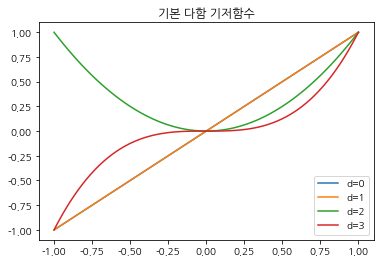

In [13]:
phi_0 = np.polynomial.Polynomial.basis(1)
phi_1 = np.polynomial.Polynomial.basis(1)
phi_2 = np.polynomial.Polynomial.basis(2)
phi_3 = np.polynomial.Polynomial.basis(3)

x = np.linspace(-1, 1, 100)

plt.plot(x, phi_0(x), label= 'd=0')
plt.plot(x, phi_1(x), label= 'd=1')
plt.plot(x, phi_2(x), label= 'd=2')
plt.plot(x, phi_3(x), label='d=3')
plt.legend()
plt.title('기본 다함 기저함수')
plt.show()

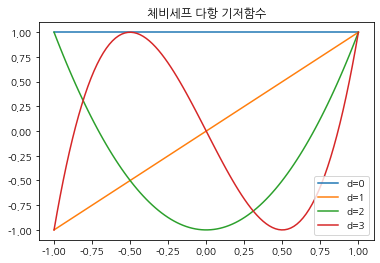

In [14]:
phi_0 = np.polynomial.chebyshev.Chebyshev.basis(0)
phi_1 = np.polynomial.chebyshev.Chebyshev.basis(1)
phi_2 = np.polynomial.chebyshev.Chebyshev.basis(2)
phi_3 = np.polynomial.chebyshev.Chebyshev.basis(3)

x = np.linspace (-1, 1, 100)

plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.legend()
plt.title("체비세프 다항 기저함수")
plt.show()

## SatsModels를 이용한 다항회귀

In [17]:
dfX = pd.DataFrame(X, columns=['x'])
dfX =sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=['y'])
df = pd.concat([dfX, dfy], axis=1)

print(sm.OLS.from_formula('y ~ x', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.69e-06
Time:                        17:46:16   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [18]:
print(sm.OLS.from_formula('y ~ x +I(x**2)', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           9.14e-06
Time:                        17:47:54   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

In [19]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.06e-17
Time:                        17:48:57   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

In [20]:
def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)
    
    dfX = pd.DataFrame(X, columns=['x'])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=['y'])
    df = pd.concat([dfX, dfy], axis=1)
    
    model_str = 'y ~ '
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()

    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("차수={}, 시드값={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)

    return result

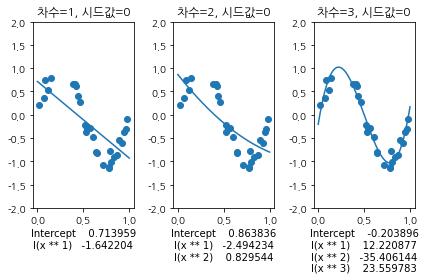

In [23]:
ax1 = plt.subplot(131)
polyreg(1, ax=ax1)
ax2 = plt.subplot(132)
polyreg(2, ax=ax2)
ax3 = plt.subplot(133)
polyreg(3, ax=ax3)
plt.tight_layout()
plt.show()

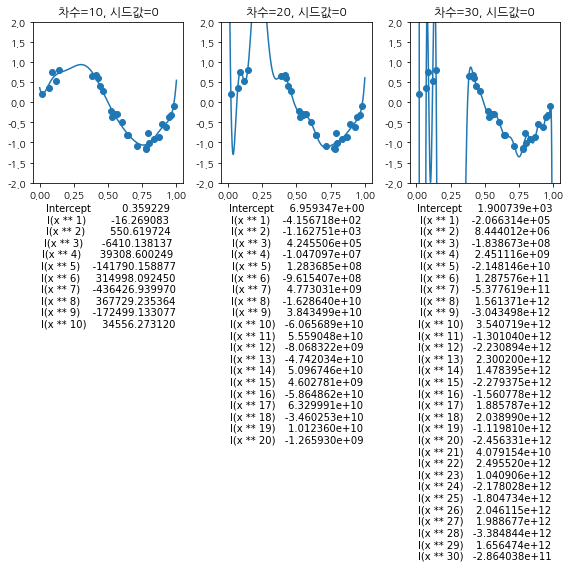

In [30]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(10, ax=ax1)

ax2 = plt.subplot(132)
polyreg(20, ax=ax2)

ax3 = plt.subplot(133)
polyreg(30, ax=ax3)

plt.tight_layout()
plt.show()

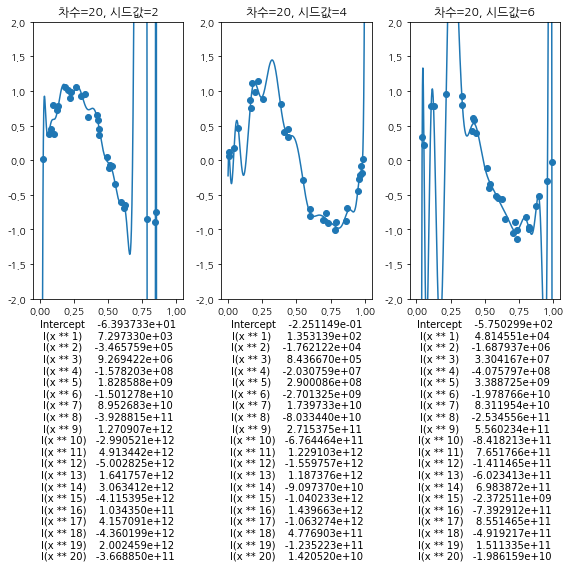

In [31]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.tight_layout()
plt.show()